In [3]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv(r"C:\Users\Clarisa Hilario\Downloads\202102-citibike-tripdata.csv")
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,304,2021-02-01 00:04:23.0780,2021-02-01 00:09:27.7920,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,4045,West End Ave & W 60 St,40.772370,-73.990050,27451,Subscriber,1996,2
1,370,2021-02-01 00:07:08.8080,2021-02-01 00:13:19.4670,3154,E 77 St & 3 Ave,40.773142,-73.958562,3725,2 Ave & E 72 St,40.768762,-73.958408,35000,Subscriber,1991,1
2,635,2021-02-01 00:07:55.9390,2021-02-01 00:18:31.0390,502,Henry St & Grand St,40.714211,-73.981095,411,E 6 St & Avenue D,40.722281,-73.976687,49319,Subscriber,1980,2
3,758,2021-02-01 00:08:42.0960,2021-02-01 00:21:20.7820,3136,5 Ave & E 63 St,40.766368,-73.971518,3284,E 88 St & Park Ave,40.781411,-73.955959,48091,Customer,1969,0
4,522,2021-02-01 00:09:32.6820,2021-02-01 00:18:15.4100,505,6 Ave & W 33 St,40.749013,-73.988484,3687,E 33 St & 1 Ave,40.743227,-73.974498,48596,Subscriber,1988,1


In [5]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

data['dayofweek'] = data['starttime'].dt.dayofweek
data['hourofday'] = data['starttime'].dt.hour
data['year'] = data['starttime'].dt.year

In [6]:
data['duration_min'] = data['tripduration']/60

In [7]:
data['age'] = data['starttime'].dt.year - data['birth year']
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,dayofweek,hourofday,year,duration_min,age
0,304,2021-02-01 00:04:23.078,2021-02-01 00:09:27.792,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,4045,West End Ave & W 60 St,40.772370,-73.990050,27451,Subscriber,1996,2,0,0,2021,5.066667,25
1,370,2021-02-01 00:07:08.808,2021-02-01 00:13:19.467,3154,E 77 St & 3 Ave,40.773142,-73.958562,3725,2 Ave & E 72 St,40.768762,-73.958408,35000,Subscriber,1991,1,0,0,2021,6.166667,30
2,635,2021-02-01 00:07:55.939,2021-02-01 00:18:31.039,502,Henry St & Grand St,40.714211,-73.981095,411,E 6 St & Avenue D,40.722281,-73.976687,49319,Subscriber,1980,2,0,0,2021,10.583333,41
3,758,2021-02-01 00:08:42.096,2021-02-01 00:21:20.782,3136,5 Ave & E 63 St,40.766368,-73.971518,3284,E 88 St & Park Ave,40.781411,-73.955959,48091,Customer,1969,0,0,0,2021,12.633333,52
4,522,2021-02-01 00:09:32.682,2021-02-01 00:18:15.410,505,6 Ave & W 33 St,40.749013,-73.988484,3687,E 33 St & 1 Ave,40.743227,-73.974498,48596,Subscriber,1988,1,0,0,2021,8.700000,33


In [9]:
data.shape 

(634631, 20)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634631 entries, 0 to 634630
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             634631 non-null  int64         
 1   starttime                634631 non-null  datetime64[ns]
 2   stoptime                 634631 non-null  datetime64[ns]
 3   start station id         634631 non-null  int64         
 4   start station name       634631 non-null  object        
 5   start station latitude   634631 non-null  float64       
 6   start station longitude  634631 non-null  float64       
 7   end station id           634631 non-null  int64         
 8   end station name         634631 non-null  object        
 9   end station latitude     634631 non-null  float64       
 10  end station longitude    634631 non-null  float64       
 11  bikeid                   634631 non-null  int64         
 12  usertype        

In [11]:
data.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,dayofweek,hourofday,year,duration_min,age
count,6.346310e+05,634631.000000,634631.000000,634631.000000,634631.000000,634631.000000,634631.000000,634631.000000,634631.000000,634631.000000,634631.000000,634631.000000,634631.0,634631.000000,634631.000000
mean,1.044040e+03,2113.291434,40.741955,-73.976605,2113.355662,40.741686,-73.976779,41295.079259,1971.745553,0.342484,3.147275,14.011964,2021.0,17.400660,49.254447
std,1.206238e+04,1576.082952,0.034753,0.022764,1576.501895,0.034642,0.022868,7149.176733,8.307802,0.608901,1.865895,4.586800,0.0,201.039591,8.307802
min,6.100000e+01,72.000000,40.644512,-74.023087,72.000000,40.644512,-74.043991,14534.000000,1885.000000,0.000000,0.000000,0.000000,2021.0,1.016667,17.000000
25%,3.450000e+02,438.000000,40.718822,-73.992573,437.000000,40.718822,-73.993012,36480.000000,1969.000000,0.000000,2.000000,11.000000,2021.0,5.750000,52.000000
50%,5.930000e+02,3115.000000,40.741740,-73.981540,3115.000000,40.741459,-73.981687,42766.000000,1969.000000,0.000000,3.000000,15.000000,2021.0,9.883333,52.000000
75%,1.036000e+03,3538.000000,40.764719,-73.961255,3537.000000,40.763954,-73.961199,47762.000000,1969.000000,1.000000,5.000000,17.000000,2021.0,17.266667,52.000000
max,2.065242e+06,4419.000000,40.852252,-73.884308,4419.000000,40.852252,-73.884308,50133.000000,2004.000000,2.000000,6.000000,23.000000,2021.0,34420.700000,136.000000


In [12]:
data.describe(include=np.object)

,start station name,end station name,usertype
count,634631,634631,634631
unique,1274,1283,2
top,1 Ave & E 68 St,1 Ave & E 68 St,Customer
freq,4251,4226,468459


In [37]:
z_scores = zscore(data["age"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
filtered_age = (abs_z_scores < 3) 

# Array of boolean values where value is True if it is an outlier, otherwise False.
duration_min_outliers = (abs_z_scores >= 3)
data[duration_min_outliers].age # Show outlier values

25        21
28        23
32        23
33        22
37        21
          ..
634384    21
634413    79
634474    21
634478    23
634621    21
Name: age, Length: 11091, dtype: int64

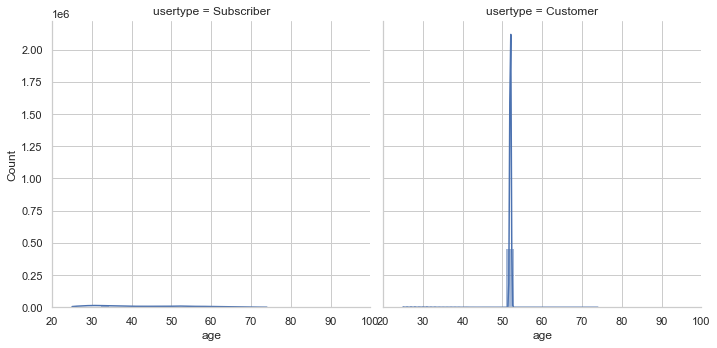

In [38]:
sns.set_theme(style="whitegrid")
usertype_age_plot=sns.displot(data=data[filtered_age],
                             x="age", col="usertype",
                             kde=True)
usertype_age_plot.set(xlim=(20,100))


there are more customer users compared to subsrcibers. Most customer users's age range from 50 to 60 years old and subscribers have a well distributed age range between 20 to 80 years old but slightly peaks near 30 years old.

In [18]:
od_trips = data.groupby(['start station name', 'end station name', 'duration_min'], as_index=False)['bikeid'].count()
od_trips = od_trips.rename(columns={"start station name": "start",
                                    "end station name": "end",
                                    "duration_min" : "duration",
                                    "bikeid": "total_trips"
                                    }, errors="raise")
od_trips.head()

,start,end,duration,total_trips
0,1 Ave & E 110 St,1 Ave & E 110 St,1.083333,1
1,1 Ave & E 110 St,1 Ave & E 110 St,1.233333,1
2,1 Ave & E 110 St,1 Ave & E 110 St,1.400000,1
3,1 Ave & E 110 St,1 Ave & E 110 St,1.700000,1
4,1 Ave & E 110 St,1 Ave & E 110 St,1.866667,1


In [19]:
z_scores = zscore(od_trips["duration"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
filtered_entries = (abs_z_scores < 3) 

# Array of boolean values where value is True if it is an outlier, otherwise False.
duration_min_outliers = (abs_z_scores >= 3)
od_trips[duration_min_outliers].duration # Show outlier values

1612       1724.483333
4175       1827.683333
6869       6632.350000
6902       3578.966667
7844       1109.816667
              ...     
616671     3123.816667
618632     3998.183333
618856     1394.650000
619271    17149.700000
619587     1103.750000
Name: duration, Length: 622, dtype: float64

In [20]:
od_trips["od"] = od_trips["start"] + " to " + od_trips["end"]
od_trips

,start,end,duration,total_trips,od
0,1 Ave & E 110 St,1 Ave & E 110 St,1.083333,1,1 Ave & E 110 St to 1 Ave & E 110 St
1,1 Ave & E 110 St,1 Ave & E 110 St,1.233333,1,1 Ave & E 110 St to 1 Ave & E 110 St
2,1 Ave & E 110 St,1 Ave & E 110 St,1.400000,1,1 Ave & E 110 St to 1 Ave & E 110 St
3,1 Ave & E 110 St,1 Ave & E 110 St,1.700000,1,1 Ave & E 110 St to 1 Ave & E 110 St
4,1 Ave & E 110 St,1 Ave & E 110 St,1.866667,1,1 Ave & E 110 St to 1 Ave & E 110 St
...,...,...,...,...,...
620503,Wythe Ave & Metropolitan Ave,Wythe Ave & Metropolitan Ave,49.583333,1,Wythe Ave & Metropolitan Ave to Wythe Ave & Me...
620504,Wythe Ave & Metropolitan Ave,Wythe Ave & Metropolitan Ave,53.616667,1,Wythe Ave & Metropolitan Ave to Wythe Ave & Me...
620505,Wythe Ave & Metropolitan Ave,Wythe Ave & Metropolitan Ave,59.866667,1,Wythe Ave & Metropolitan Ave to Wythe Ave & Me...
620506,Wythe Ave & Metropolitan Ave,Wythe Ave & Metropolitan Ave,67.316667,1,Wythe Ave & Metropolitan Ave to Wythe Ave & Me...


[(0.0, 80.0)]

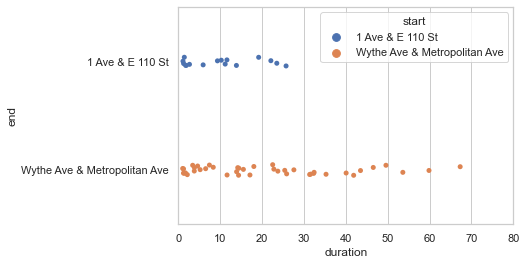

In [43]:
#stations_duration_plot=sns.catplot(data=od_trips[filtered_entries], kind="swarm", x="duration", y="end", hue = "start",
#                                   order=['1 Ave & E 110 St']
#                                   )
stations_duration_plot = sns.stripplot(x="duration", y="end", order = ["1 Ave & E 110 St", "Wythe Ave & Metropolitan Ave"],
                                       hue = "start", hue_order = ["1 Ave & E 110 St", "Wythe Ave & Metropolitan Ave"],
                                       data=od_trips[filtered_entries], jitter=0.05)
#stations_duration_plot.set(ylim=(0,5))
stations_duration_plot.set(xlim=(0,80))

There is more distribution of trip duration in round way trip of Wythe Ave & Metropolitan Ave than the round way trip of 1 Ave & E 110 St.